### Dataset 

This dataset contains information about various restaurants and aims to predict the revenue based on several features. Each row represents a unique restaurant with various attributes that may influence its revenue.

#### Columns

Name: The name of the restaurant.

Location: The location of the restaurant (e.g., Rural, Downtown).

Cuisine: The type of cuisine offered (e.g., Japanese, Mexican, Italian).

Rating: The average rating of the restaurant.

Seating Capacity: The number of seats available in the restaurant.

Average Meal Price: The average price of a meal at the restaurant.

Marketing Budget: The marketing budget allocated for the restaurant.

Social Media Followers: The number of social media followers.

Chef Experience Years: The number of years of experience of the head chef.

Number of Reviews: The total number of reviews the restaurant has received.

Avg Review Length: The average length of reviews.

Ambience Score: A score representing the ambience of the restaurant.

Service Quality Score: A score representing the quality of service.

Parking Availability: Indicates if parking is available (Yes/No).

Weekend Reservations: The number of reservations made on weekends.

Weekday Reservations: The number of reservations made on weekdays.

Revenue: The total revenue generated by the restaurant.

### Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

### Importing Dataset

In [2]:
data = pd.read_csv('restaurant_data (1).csv')

In [3]:
data

,Name,Location,Cuisine,Rating,Seating Capacity,Average Meal Price,Marketing Budget,Social Media Followers,Chef Experience Years,Number of Reviews,Avg Review Length,Ambience Score,Service Quality Score,Parking Availability,Weekend Reservations,Weekday Reservations,Revenue
0,Restaurant 0,Rural,Japanese,4.0,38,73.98,2224,23406,13,185,161.924906,1.3,7.0,Yes,13,4,638945.52
1,Restaurant 1,Downtown,Mexican,3.2,76,28.11,4416,42741,8,533,148.759717,2.6,3.4,Yes,48,6,490207.83
2,Restaurant 2,Rural,Italian,4.7,48,48.29,2796,37285,18,853,56.849189,5.3,6.7,No,27,14,541368.62
3,Restaurant 3,Rural,Italian,4.4,34,51.55,1167,15214,13,82,205.433265,4.6,2.8,Yes,9,17,404556.80
4,Restaurant 4,Downtown,Japanese,4.9,88,75.98,3639,40171,9,78,241.681584,8.6,2.1,No,37,26,1491046.35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8363,Restaurant 8363,Suburban,Indian,3.4,54,34.85,1102,11298,11,380,253.919515,9.5,5.0,Yes,37,0,434653.45
8364,Restaurant 8364,Rural,Indian,3.7,49,36.88,1988,20432,9,713,175.590195,2.7,2.6,No,37,21,414977.92
8365,Restaurant 8365,Downtown,Italian,4.7,88,46.87,5949,63945,6,436,222.953647,4.8,1.7,Yes,83,21,930395.87
8366,Restaurant 8366,Rural,American,3.1,31,44.53,707,7170,1,729,178.482851,6.1,2.1,No,6,21,311493.48


In [4]:
data['Location'].unique()

array(['Rural', 'Downtown', 'Suburban'], dtype=object)

In [5]:
data['Cuisine'].unique()

array(['Japanese', 'Mexican', 'Italian', 'Indian', 'French', 'American'],
      dtype=object)

In [6]:
data.columns

Index(['Name', 'Location', 'Cuisine', 'Rating', 'Seating Capacity',
       'Average Meal Price', 'Marketing Budget', 'Social Media Followers',
       'Chef Experience Years', 'Number of Reviews', 'Avg Review Length',
       'Ambience Score', 'Service Quality Score', 'Parking Availability',
       'Weekend Reservations', 'Weekday Reservations', 'Revenue'],
      dtype='object')

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8368 entries, 0 to 8367
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Name                    8368 non-null   object 
 1   Location                8368 non-null   object 
 2   Cuisine                 8368 non-null   object 
 3   Rating                  8368 non-null   float64
 4   Seating Capacity        8368 non-null   int64  
 5   Average Meal Price      8368 non-null   float64
 6   Marketing Budget        8368 non-null   int64  
 7   Social Media Followers  8368 non-null   int64  
 8   Chef Experience Years   8368 non-null   int64  
 9   Number of Reviews       8368 non-null   int64  
 10  Avg Review Length       8368 non-null   float64
 11  Ambience Score          8368 non-null   float64
 12  Service Quality Score   8368 non-null   float64
 13  Parking Availability    8368 non-null   object 
 14  Weekend Reservations    8368 non-null   

In [8]:
data.isna().sum()

Name                      0
Location                  0
Cuisine                   0
Rating                    0
Seating Capacity          0
Average Meal Price        0
Marketing Budget          0
Social Media Followers    0
Chef Experience Years     0
Number of Reviews         0
Avg Review Length         0
Ambience Score            0
Service Quality Score     0
Parking Availability      0
Weekend Reservations      0
Weekday Reservations      0
Revenue                   0
dtype: int64

##### no null value in dataset

In [9]:
data['Location'].unique()  # unique values in Location column

array(['Rural', 'Downtown', 'Suburban'], dtype=object)

In [10]:
data.nunique()   # number of unique values in each column

Name                      8368
Location                     3
Cuisine                      6
Rating                      21
Seating Capacity            61
Average Meal Price        3966
Marketing Budget          4396
Social Media Followers    7799
Chef Experience Years       19
Number of Reviews          949
Avg Review Length         8368
Ambience Score              91
Service Quality Score       91
Parking Availability         2
Weekend Reservations        89
Weekday Reservations        89
Revenue                   8368
dtype: int64

In [11]:
data.describe()

,Rating,Seating Capacity,Average Meal Price,Marketing Budget,Social Media Followers,Chef Experience Years,Number of Reviews,Avg Review Length,Ambience Score,Service Quality Score,Weekend Reservations,Weekday Reservations,Revenue
count,8368.000000,8368.000000,8368.000000,8368.000000,8368.000000,8368.000000,8368.000000,8368.000000,8368.000000,8368.000000,8368.000000,8368.000000,8.368000e+03
mean,4.008258,60.212835,47.896659,3218.254900,36190.621773,10.051984,523.010397,174.769974,5.521283,5.508772,29.491754,29.235301,6.560706e+05
std,0.581474,17.399488,14.336767,1824.896053,18630.153330,5.516606,277.215127,71.998060,2.575442,2.586552,20.025415,20.004277,2.674137e+05
min,3.000000,30.000000,25.000000,604.000000,5277.000000,1.000000,50.000000,50.011717,1.000000,1.000000,0.000000,0.000000,1.847085e+05
25%,3.500000,45.000000,35.490000,1889.000000,22592.500000,5.000000,277.000000,113.311102,3.300000,3.200000,13.000000,13.000000,4.546514e+05
50%,4.000000,60.000000,45.535000,2846.500000,32518.500000,10.000000,528.000000,173.910079,5.500000,5.600000,27.000000,26.000000,6.042421e+05
75%,4.500000,75.000000,60.300000,4008.500000,44566.250000,15.000000,764.250000,237.406885,7.800000,7.800000,43.000000,43.000000,8.130942e+05
max,5.000000,90.000000,76.000000,9978.000000,103777.000000,19.000000,999.000000,299.984924,10.000000,10.000000,88.000000,88.000000,1.531868e+06


<Axes: xlabel='Location', ylabel='count'>

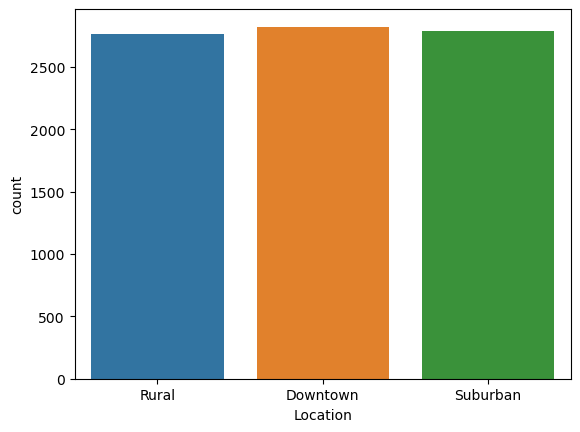

In [12]:
sns.countplot(x='Location', data=data)

<Axes: xlabel='Parking Availability', ylabel='count'>

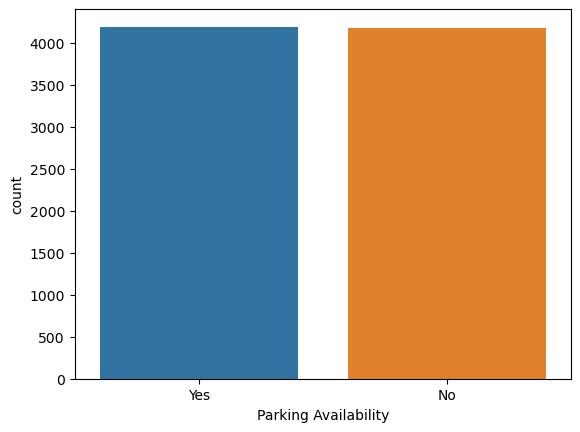

In [13]:
sns.countplot(x='Parking Availability', data=data)

<Axes: xlabel='Cuisine', ylabel='count'>

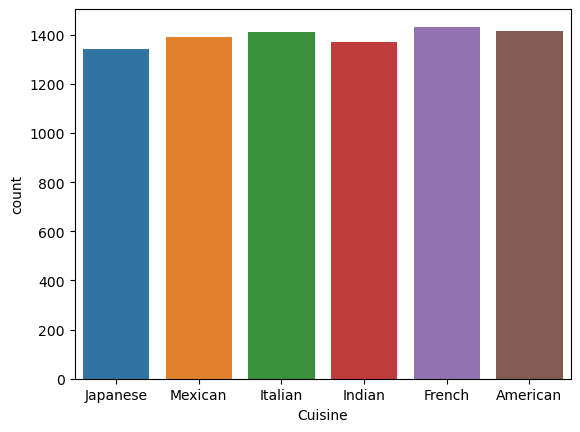

In [14]:
sns.countplot(x='Cuisine', data=data)

<Axes: xlabel='Cuisine', ylabel='count'>

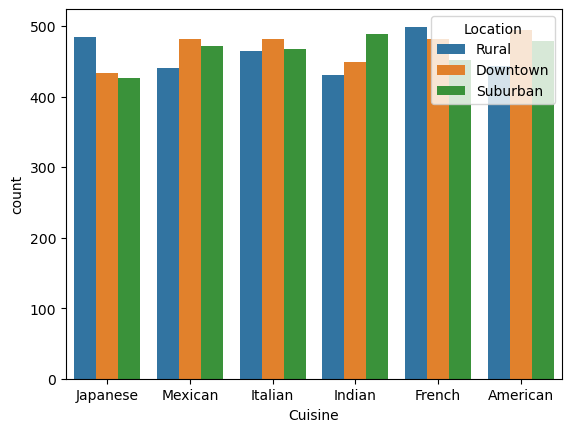

In [15]:
sns.countplot(x='Cuisine', data=data, hue='Location')

In [16]:
data['Revenue'].min(), data['Revenue'].max()

(184708.52, 1531867.55)

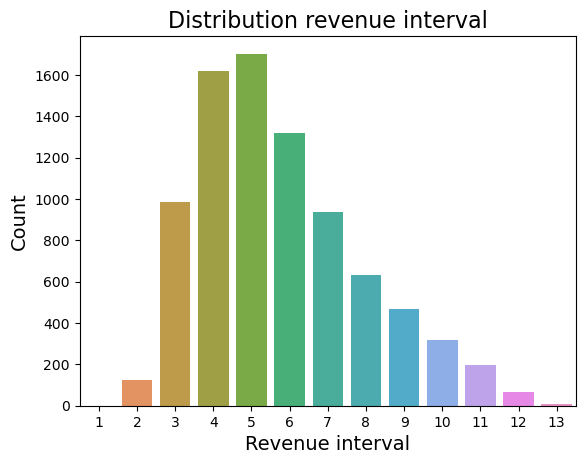

In [17]:
#For analysis, we will divide the "Revenue" column into intervals of 125,000
bins = [i * 125000 for i in range(0, 14)]
labels = [i for i in range(1, 14)]


data['Revenue interval'] = pd.cut(data["Revenue"], bins=bins, labels=labels, include_lowest=True)

sns.countplot(data=data, x='Revenue interval')
plt.xlabel('Revenue interval', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.title('Distribution revenue interval', fontsize=16)
plt.show()

In [18]:
data['Revenue interval'] = data['Revenue interval'].astype(int)

In [19]:
data.loc[(data['Revenue'] <= 200000) | (data['Revenue'] >= 1500000)].reset_index()

,index,Name,Location,Cuisine,Rating,Seating Capacity,Average Meal Price,Marketing Budget,Social Media Followers,Chef Experience Years,Number of Reviews,Avg Review Length,Ambience Score,Service Quality Score,Parking Availability,Weekend Reservations,Weekday Reservations,Revenue,Revenue interval
0,2196,Restaurant 2196,Downtown,Japanese,3.6,90,75.51,2057,25811,3,308,115.570703,9.5,2.8,No,22,70,1509391.07,13
1,2761,Restaurant 2761,Rural,Mexican,4.2,30,26.58,912,16181,14,160,70.561439,5.1,1.4,Yes,3,13,194802.93,2
2,2804,Restaurant 2804,Downtown,Japanese,4.5,90,74.21,3140,40471,16,926,233.060276,3.6,6.2,Yes,50,76,1501515.11,13
3,3039,Restaurant 3039,Downtown,Japanese,4.7,89,75.71,4937,54280,6,818,165.794969,4.0,4.9,Yes,0,62,1502563.13,13
4,3952,Restaurant 3952,Downtown,Japanese,4.1,90,74.80,6627,72844,17,693,87.249043,7.8,4.4,No,21,22,1515593.10,13
5,4324,Restaurant 4324,Downtown,Japanese,4.1,90,75.83,3115,34238,17,535,215.186349,5.5,5.7,No,33,62,1531867.55,13
6,5431,Restaurant 5431,Downtown,Japanese,4.5,89,75.51,6812,68002,18,907,195.191806,4.6,1.7,Yes,10,85,1515520.96,13
7,5735,Restaurant 5735,Rural,Mexican,3.7,30,25.38,1350,12738,9,157,54.238534,7.1,3.4,Yes,25,4,184708.52,2
8,7093,Restaurant 7093,Downtown,Japanese,3.6,90,75.41,4666,45465,15,776,239.065091,1.2,8.8,Yes,7,17,1518965.19,13


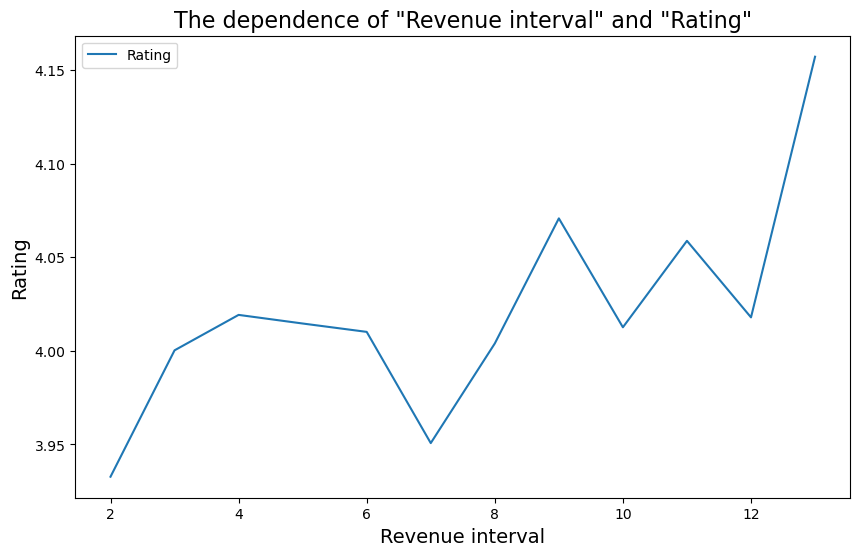

In [20]:
groupby_df = data.groupby('Revenue interval').agg({'Rating': 'mean'})

groupby_df.plot(figsize=(10,6))
plt.xlabel('Revenue interval', fontsize=14)
plt.ylabel('Rating', fontsize=14)
plt.title('The dependence of "Revenue interval" and "Rating"', fontsize=16)
plt.show()

In [21]:
groupby_df = data.groupby('Cuisine', as_index=False).agg({'Rating': 'mean'})
groupby_df

,Cuisine,Rating
0,American,3.992302
1,French,4.000977
2,Indian,4.012856
3,Italian,4.014650
4,Japanese,4.012574
5,Mexican,4.016798


In [22]:
groupby_df = data.groupby('Location', as_index=False).agg({'Rating': 'mean'})
groupby_df

,Location,Rating
0,Downtown,4.013364
1,Rural,4.012962
2,Suburban,3.998420


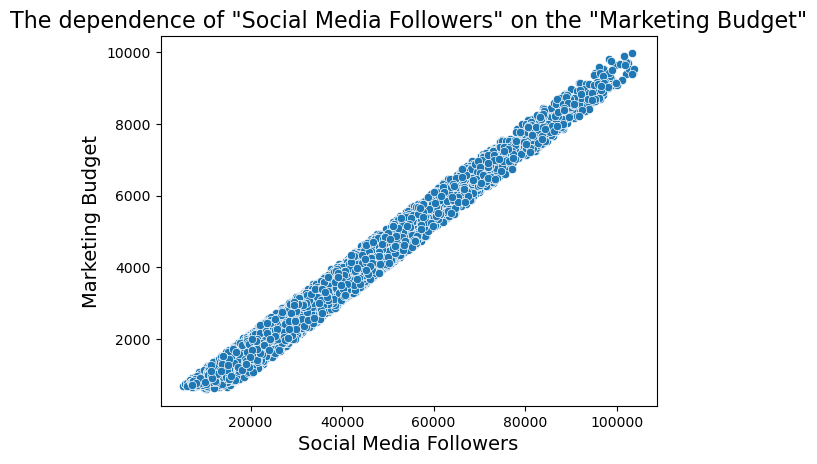

In [23]:
sns.scatterplot(x=data['Social Media Followers'], y=data['Marketing Budget'])
plt.xlabel('Social Media Followers', fontsize=14)
plt.ylabel('Marketing Budget', fontsize=14)
plt.title('The dependence of "Social Media Followers" on the "Marketing Budget"', fontsize=16)
plt.show()

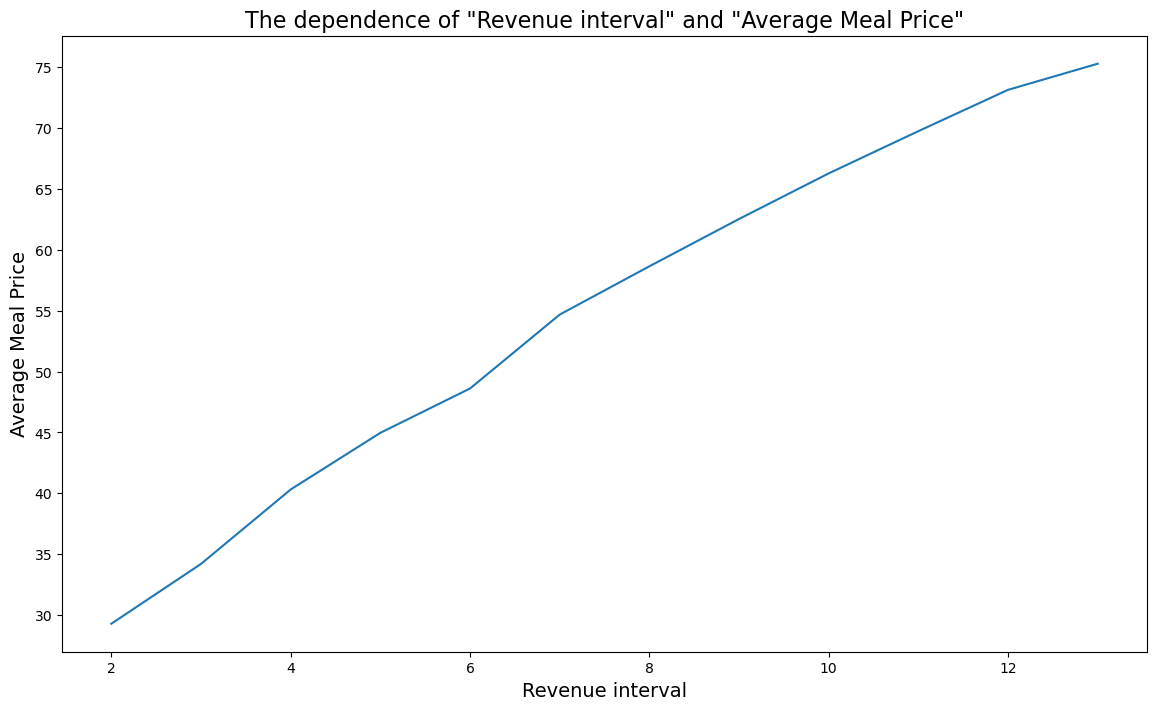

In [24]:
groupby_df = data.groupby('Revenue interval', as_index=False).agg({'Average Meal Price': 'mean'})

plt.figure(figsize=(14,8))
sns.lineplot(x=groupby_df['Revenue interval'], y=groupby_df['Average Meal Price'])
y_ticks = range(30, 80, 5)
plt.yticks(y_ticks)
plt.xlabel('Revenue interval', fontsize=14)
plt.ylabel('Average Meal Price', fontsize=14)
plt.title('The dependence of "Revenue interval" and "Average Meal Price"', fontsize=16)
plt.show()

In all categorical columns, the data is evenly distributed. The distribution of Cuisine is about the same depending on the Location. The Rating does not depend on the Cuisine and the Location of the restaurant. Linear relationship between Social Media Followers and Marketing Budget. With the growth of the Revenue interval, the Average Meal Price also grows.

In [25]:
data.drop(['Revenue interval', 'Name'], axis=1, inplace=True)

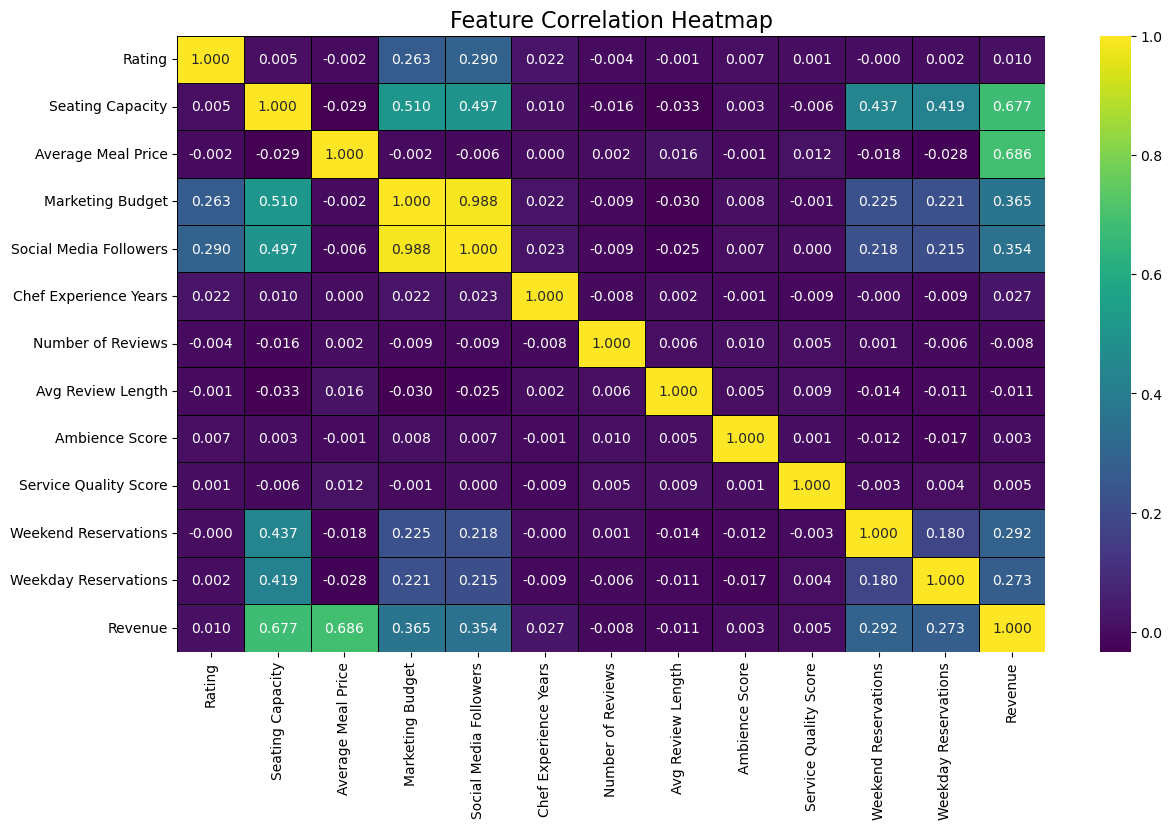

In [26]:
corr_matrix = data[data.select_dtypes(include=['int64', 'float64']).columns].corr()
plt.figure(figsize=(14, 8))
sns.heatmap(corr_matrix, annot=True, cmap='viridis', linewidths=0.5, linecolor='black', fmt=".3f")
plt.title('Feature Correlation Heatmap', fontsize=16)
plt.show()

In [27]:
excluded_numeric_factors = ['Rating', 'Number of Reviews', 'Avg Review Length', 'Ambience Score', 'Service Quality Score']
useful_factors = [i for i in data.columns if i not in excluded_numeric_factors]
useful_factors

['Location',
 'Cuisine',
 'Seating Capacity',
 'Average Meal Price',
 'Marketing Budget',
 'Social Media Followers',
 'Chef Experience Years',
 'Parking Availability',
 'Weekend Reservations',
 'Weekday Reservations',
 'Revenue']

In [28]:
data = data[useful_factors]

##### Feature Encoding

In [29]:
numerical_columns = data.select_dtypes(include=['int64', 'float64']).columns
categorical_columns = data.select_dtypes(include=['object']).columns

In [30]:
encoder = OneHotEncoder(sparse_output=False)
encoded_features = encoder.fit_transform(data[categorical_columns])

In [31]:
encoded_df = pd.DataFrame(encoded_features, columns=encoder.get_feature_names_out(categorical_columns))

In [32]:
data

,Location,Cuisine,Seating Capacity,Average Meal Price,Marketing Budget,Social Media Followers,Chef Experience Years,Parking Availability,Weekend Reservations,Weekday Reservations,Revenue
0,Rural,Japanese,38,73.98,2224,23406,13,Yes,13,4,638945.52
1,Downtown,Mexican,76,28.11,4416,42741,8,Yes,48,6,490207.83
2,Rural,Italian,48,48.29,2796,37285,18,No,27,14,541368.62
3,Rural,Italian,34,51.55,1167,15214,13,Yes,9,17,404556.80
4,Downtown,Japanese,88,75.98,3639,40171,9,No,37,26,1491046.35
...,...,...,...,...,...,...,...,...,...,...,...
8363,Suburban,Indian,54,34.85,1102,11298,11,Yes,37,0,434653.45
8364,Rural,Indian,49,36.88,1988,20432,9,No,37,21,414977.92
8365,Downtown,Italian,88,46.87,5949,63945,6,Yes,83,21,930395.87
8366,Rural,American,31,44.53,707,7170,1,No,6,21,311493.48


In [33]:
data = data.join(encoded_df)
data = data.drop(categorical_columns, axis=1)
data.head()

,Seating Capacity,Average Meal Price,Marketing Budget,Social Media Followers,Chef Experience Years,Weekend Reservations,Weekday Reservations,Revenue,Location_Downtown,Location_Rural,Location_Suburban,Cuisine_American,Cuisine_French,Cuisine_Indian,Cuisine_Italian,Cuisine_Japanese,Cuisine_Mexican,Parking Availability_No,Parking Availability_Yes
0,38,73.98,2224,23406,13,13,4,638945.52,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
1,76,28.11,4416,42741,8,48,6,490207.83,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
2,48,48.29,2796,37285,18,27,14,541368.62,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,34,51.55,1167,15214,13,9,17,404556.80,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,88,75.98,3639,40171,9,37,26,1491046.35,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


##### Splitting of Data

In [34]:
X = data.drop(columns='Revenue')
y = data['Revenue']

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

##### Feature Scaling 

In [36]:
scaler = StandardScaler()
scaler.fit(X_train)

StandardScaler()

In [37]:
X_train[X_train.columns] = scaler.transform(X_train)
X_train

,Seating Capacity,Average Meal Price,Marketing Budget,Social Media Followers,Chef Experience Years,Weekend Reservations,Weekday Reservations,Location_Downtown,Location_Rural,Location_Suburban,Cuisine_American,Cuisine_French,Cuisine_Indian,Cuisine_Italian,Cuisine_Japanese,Cuisine_Mexican,Parking Availability_No,Parking Availability_Yes
7356,1.074555,0.766697,-0.256601,-0.406898,0.534265,-0.277955,-1.362638,1.395100,-0.695177,-0.709406,-0.449216,2.170623,-0.441751,-0.454968,-0.427906,-0.448496,1.007799,-1.007799
8307,-0.596350,-0.398137,-0.369612,-0.588351,1.438119,0.568215,0.832452,-0.716795,-0.695177,1.409631,2.226099,-0.460697,-0.441751,-0.454968,-0.427906,-0.448496,1.007799,-1.007799
208,1.477877,0.376081,2.255852,2.008412,-0.369589,2.708528,-0.963531,1.395100,-0.695177,-0.709406,-0.449216,-0.460697,-0.441751,2.197956,-0.427906,-0.448496,-0.992262,0.992262
5303,1.535495,1.852285,0.361958,0.468574,-1.092672,-1.372998,1.231560,1.395100,-0.695177,-0.709406,-0.449216,-0.460697,-0.441751,-0.454968,2.336962,-0.448496,1.007799,-1.007799
747,-0.193028,1.530396,-0.150687,-0.173952,0.534265,1.016188,0.283680,-0.716795,-0.695177,1.409631,-0.449216,-0.460697,-0.441751,-0.454968,2.336962,-0.448496,1.007799,-1.007799
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5734,0.210294,-0.135856,0.365780,0.152771,-0.911902,-0.775702,-0.913642,-0.716795,-0.695177,1.409631,2.226099,-0.460697,-0.441751,-0.454968,-0.427906,-0.448496,1.007799,-1.007799
5191,0.844086,1.186766,0.209639,0.118032,0.895807,-0.576603,-1.262861,1.395100,-0.695177,-0.709406,-0.449216,2.170623,-0.441751,-0.454968,-0.427906,-0.448496,-0.992262,0.992262
5390,1.247407,-0.485797,0.594532,0.614112,1.438119,1.613484,0.982118,1.395100,-0.695177,-0.709406,2.226099,-0.460697,-0.441751,-0.454968,-0.427906,-0.448496,1.007799,-1.007799
860,-0.596350,-0.835037,-0.693359,-0.673190,-0.911902,-1.124125,-0.664200,-0.716795,-0.695177,1.409631,-0.449216,-0.460697,-0.441751,-0.454968,-0.427906,2.229676,1.007799,-1.007799


In [38]:
X_test[X_test.columns] = scaler.transform(X_test)
X_test

,Seating Capacity,Average Meal Price,Marketing Budget,Social Media Followers,Chef Experience Years,Weekend Reservations,Weekday Reservations,Location_Downtown,Location_Rural,Location_Suburban,Cuisine_American,Cuisine_French,Cuisine_Indian,Cuisine_Italian,Cuisine_Japanese,Cuisine_Mexican,Parking Availability_No,Parking Availability_Yes
2412,-0.481115,-0.508940,-0.694451,-0.494306,-1.634985,-0.477053,-0.464646,-0.716795,-0.695177,1.409631,-0.449216,-0.460697,2.263720,-0.454968,-0.427906,-0.448496,-0.992262,0.992262
6832,-0.999672,-1.313313,-0.699911,-0.559233,0.895807,-1.024575,-0.614312,-0.716795,1.438483,-0.709406,-0.449216,-0.460697,-0.441751,-0.454968,-0.427906,2.229676,-0.992262,0.992262
5154,-1.287759,0.275097,-1.049317,-1.109267,0.895807,-0.128631,-0.314981,-0.716795,1.438483,-0.709406,-0.449216,-0.460697,-0.441751,2.197956,-0.427906,-0.448496,1.007799,-1.007799
7081,0.095059,1.449047,-0.814014,-1.056972,-1.454214,-1.422773,-1.113196,-0.716795,-0.695177,1.409631,-0.449216,-0.460697,-0.441751,-0.454968,2.336962,-0.448496,-0.992262,0.992262
6601,0.555999,-1.006852,0.323742,0.555982,-1.454214,0.568215,0.134015,-0.716795,-0.695177,1.409631,-0.449216,-0.460697,-0.441751,-0.454968,-0.427906,2.229676,1.007799,-1.007799
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1971,0.037442,-1.055240,-0.735943,-0.603124,0.715036,0.020694,1.281448,-0.716795,-0.695177,1.409631,-0.449216,-0.460697,-0.441751,-0.454968,-0.427906,2.229676,1.007799,-1.007799
2348,-0.596350,1.673458,-1.092993,-0.847096,-0.911902,-0.875251,0.433345,-0.716795,-0.695177,1.409631,-0.449216,-0.460697,-0.441751,-0.454968,2.336962,-0.448496,-0.992262,0.992262
7882,1.132173,-0.205283,1.570142,1.624041,1.618890,0.767314,-1.212973,1.395100,-0.695177,-0.709406,2.226099,-0.460697,-0.441751,-0.454968,-0.427906,-0.448496,-0.992262,0.992262
3898,1.016938,1.286349,-0.040951,-0.215810,1.257348,-1.273449,-0.265093,1.395100,-0.695177,-0.709406,-0.449216,-0.460697,-0.441751,-0.454968,2.336962,-0.448496,1.007799,-1.007799


##### Model Training : Random Forest Regressor

In [39]:
model = RandomForestRegressor()
model.fit(X_train, y_train)

RandomForestRegressor()

In [40]:
Y_pred = model.predict(X_test)

##### Evaluation of model

In [41]:
score = r2_score(y_test, Y_pred)
print(f"R^2 score: {score}")

R^2 score: 0.9993461090718372


In [42]:
mae = round(mean_absolute_error(y_test, Y_pred), 2)
print(f"MAE: {mae}")

MAE: 5312.45


In [43]:
mse = round(mean_squared_error(y_test, Y_pred), 2)
print(f"MSE: {mse}")

MSE: 46865552.3
